# **K-Means Clustering**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-1-51c1d4841fc1>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=42)

In [ ]:
print(X.shape,y.shape)

(500, 2) (500,)


In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [ ]:
def normalize(X):
  return (X-X.mean(axis=0))/X.std(axis=0)

In [ ]:
X = normalize(X)

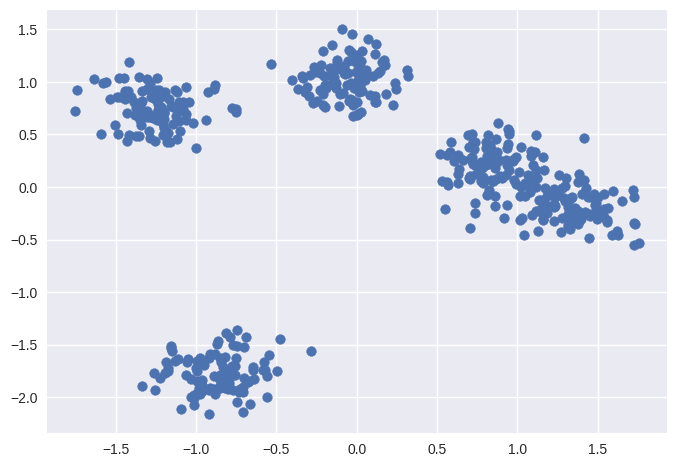

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# Define k-centroids

In [22]:
k = 5
n_features = 2

In [23]:
colors = ['r','g','b','c','m']

In [47]:
def initCentroids(k):
  centroids = {}
  for i in range(k):
    center = 2*(2*np.random.random((n_features,)) - 1)

    centroids[i] = {
        'center':center,
        'color':colors[i],
        'points':[]
    }

  return centroids

In [48]:
centroids = initCentroids(k)

In [49]:
centroids

{0: {'center': array([1.81295411, 0.333513  ]), 'color': 'r', 'points': []},
 1: {'center': array([1.05899455, 1.26791076]), 'color': 'g', 'points': []},
 2: {'center': array([1.12162019, 0.96139166]), 'color': 'b', 'points': []},
 3: {'center': array([-1.55230849,  1.05018859]), 'color': 'c', 'points': []},
 4: {'center': array([-1.88371321, -1.08429532]), 'color': 'm', 'points': []}}

# Update cluster assignments

In [50]:
def euclideanDistance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [51]:
def assignCluster(X,centroids):
  n = X.shape[0]

  for i in range(n):
    dist = []
    p = X[i]

    for j in range(k):
      d = euclideanDistance(p, centroids[j]['center'])
      dist.append(d)

    cluster = np.argmin(dist)
    centroids[cluster]['points'].append(p)

# update centroids

In [52]:
def updateCentroids(centroids):
  for i in range(k):
    points = np.array(centroids[i]['points'])

    if points.shape[0]>0:
      newCenter = points.mean(axis=0)
      centroids[i]['center'] = newCenter
      centroids[i]['points'] = []

In [53]:
def plotClusters(centroids):
  for i in range(k):
    points = np.array(centroids[i]['points'])

    if points.shape[0]>0:
      plt.scatter(points[:,0],points[:,1],color=centroids[i]['color'])

    centroid = centroids[i]['center']
    plt.scatter(centroid[0],centroid[1],color='black',marker='*')

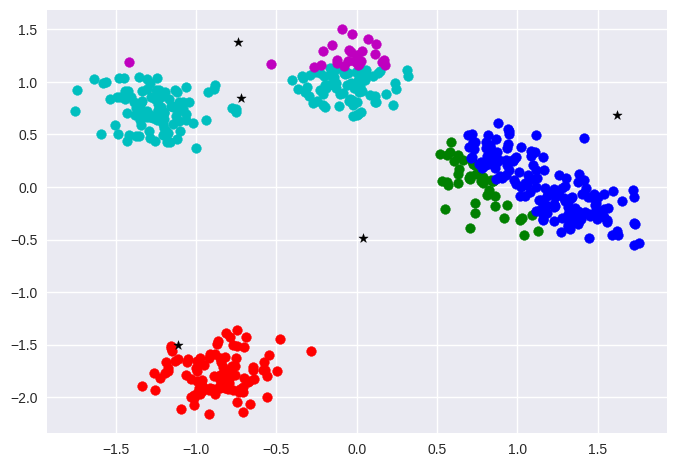

In [54]:
centroids = initCentroids(k)
assignCluster(X,centroids)
plotClusters(centroids)

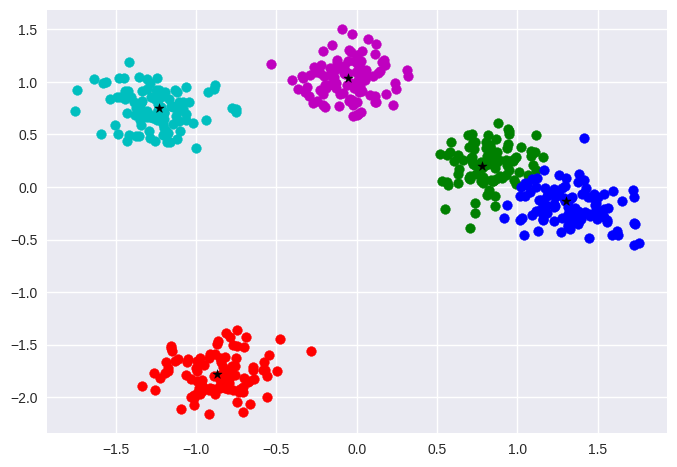

In [57]:
assignCluster(X,centroids)
plotClusters(centroids)
updateCentroids(centroids)